# Lending Club Model

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import csv 

filename=pd.read_csv("Lending_club.csv",low_memory=False)
raw_data=filename

In [3]:
# Checking our data

raw_data= pd.DataFrame(raw_data)
print(raw_data.shape)
raw_data.head()


(42542, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# List all columns

raw_data.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [5]:
# List of cols to keep

cols=['loan_amnt', 'term', 'int_rate', 'funded_amnt', 'grade', 'annual_inc', 'dti',  'delinq_2yrs', 'emp_length','loan_status','home_ownership','tax_liens']
raw=raw_data[cols]
raw.describe()

,loan_amnt,int_rate,funded_amnt,annual_inc,dti,delinq_2yrs,tax_liens
count,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42430.000000
mean,11089.722581,0.121650,10821.585753,6.913656e+04,13.373043,0.152449,0.000024
std,7410.938391,0.037079,7146.914675,6.409635e+04,6.726315,0.512406,0.004855
min,500.000000,0.054200,500.000000,1.896000e+03,0.000000,0.000000,0.000000
25%,5200.000000,0.096300,5000.000000,4.000000e+04,8.200000,0.000000,0.000000
50%,9700.000000,0.119900,9600.000000,5.900000e+04,13.470000,0.000000,0.000000
75%,15000.000000,0.147200,15000.000000,8.250000e+04,18.680000,0.000000,0.000000
max,35000.000000,0.245900,35000.000000,6.000000e+06,29.990000,13.000000,1.000000


In [6]:
# Checking missing values

raw.isnull().sum(axis=0)

loan_amnt            7
term                 7
int_rate             7
funded_amnt          7
grade                7
annual_inc          11
dti                  7
delinq_2yrs         36
emp_length        1119
loan_status          7
home_ownership       7
tax_liens          112
dtype: int64

In [7]:
# Remove missing values from all rows

raw=raw.dropna()

# Checking no missing values

raw.isnull().sum()

loan_amnt         0
term              0
int_rate          0
funded_amnt       0
grade             0
annual_inc        0
dti               0
delinq_2yrs       0
emp_length        0
loan_status       0
home_ownership    0
tax_liens         0
dtype: int64

# Loan Status

In [8]:
# Checking loan status

raw.loan_status.value_counts()

Fully Paid                                             33230
Charged Off                                             5439
Does not meet the credit policy. Status:Fully Paid      1913
Does not meet the credit policy. Status:Charged Off      736
Name: loan_status, dtype: int64

In [9]:
# Keeping the loans with Fully Paid and Charged Off status as others are not of our interest for this analysis

raw_1=raw[(raw['loan_status']=='Fully Paid')|(raw['loan_status']=='Charged Off')]
raw_1.loan_status.value_counts()


Fully Paid     33230
Charged Off     5439
Name: loan_status, dtype: int64

In [10]:
# Checking first 10 loans

raw_1.loan_status[:10] 

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9    Charged Off
Name: loan_status, dtype: object

In [11]:
# Converting loan status to binary

def_map={'Fully Paid':0,'Charged Off':1}
raw_1.loan_status.map(def_map)[:10]

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: loan_status, dtype: int64

In [12]:
# Create Default column and remove Loan status column

raw_1['Defaulted']=raw_1.loan_status.map(def_map)
raw_2=raw_1.drop('loan_status',axis=1)
raw_2.head()

<ipython-input-12-628eb669e050>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_1['Defaulted']=raw_1.loan_status.map(def_map)


,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,Defaulted
0,5000.0,36 months,0.1065,5000.0,B,24000.0,27.65,0.0,10+ years,RENT,0.0,0
1,2500.0,60 months,0.1527,2500.0,C,30000.0,1.00,0.0,< 1 year,RENT,0.0,1
2,2400.0,36 months,0.1596,2400.0,C,12252.0,8.72,0.0,10+ years,RENT,0.0,0
3,10000.0,36 months,0.1349,10000.0,C,49200.0,20.00,0.0,10+ years,RENT,0.0,0
4,3000.0,60 months,0.1269,3000.0,B,80000.0,17.94,0.0,1 year,RENT,0.0,0


# Employee Length

In [13]:
# Unique values of employee length in years

raw_2.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [14]:
# Assigning numerical value to the column

emp_map = {}
for i in range (2,10):
    key = str(i) + ' years'
    value = i
    emp_map[key] = value
    
# Checking the column

emp_map

{'2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9}

In [15]:
# Manually defining remaining values

emp_map['< 1 year'] = 0
emp_map['n/a'] = 0
emp_map['10+ years'] = 10
emp_map['1 year'] = 1
emp_map

{'2 years': 2,
 '3 years': 3,
 '4 years': 4,
 '5 years': 5,
 '6 years': 6,
 '7 years': 7,
 '8 years': 8,
 '9 years': 9,
 '< 1 year': 0,
 'n/a': 0,
 '10+ years': 10,
 '1 year': 1}

In [16]:
# Checking the column after mapping values

raw_2.emp_length.map(emp_map)[:10]

0    10
1     0
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     0
Name: emp_length, dtype: int64

In [17]:
# Changing the value in dataframe

raw_2.emp_length=raw_2.emp_length.map(emp_map)
raw_2

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,Defaulted
0,5000.0,36 months,0.1065,5000.0,B,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60 months,0.1527,2500.0,C,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36 months,0.1596,2400.0,C,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36 months,0.1349,10000.0,C,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60 months,0.1269,3000.0,B,80000.0,17.94,0.0,1,RENT,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36 months,0.0807,3500.0,A,98000.0,8.52,1.0,5,RENT,0.0,0
39749,3000.0,36 months,0.1186,3000.0,D,36153.0,7.47,0.0,2,MORTGAGE,0.0,0
39750,3500.0,36 months,0.1028,3500.0,C,20000.0,1.50,0.0,0,RENT,0.0,0
39752,5000.0,36 months,0.0743,5000.0,A,40000.0,2.55,0.0,6,RENT,0.0,0


# Grade

In [18]:
# Unique values of grade

raw_2.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [19]:
# Converting grade to numerical values

grade_map={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [20]:
# Changing values in col grade 

raw_2.grade=raw_2.grade.map(grade_map)
raw_2.grade

0        2
1        3
2        3
3        3
4        2
        ..
39748    1
39749    4
39750    3
39752    1
39753    4
Name: grade, Length: 38669, dtype: int64

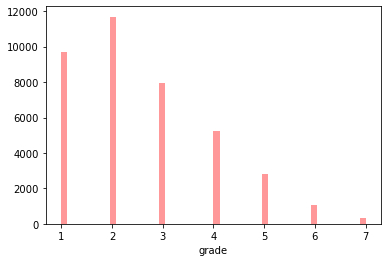

In [21]:
sns.distplot(raw_2['grade'],color='r',kde=False)

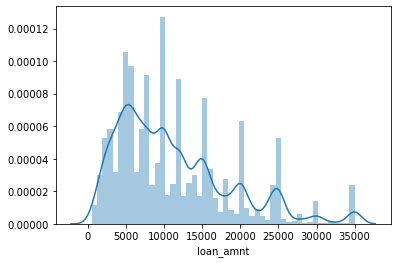

In [22]:
sns.distplot(raw['loan_amnt'])

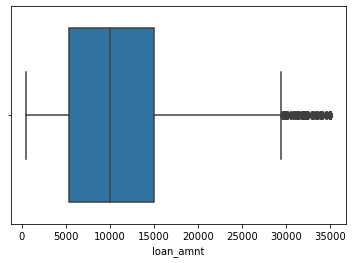

In [23]:
sns.boxplot(x='loan_amnt',data=raw)

# Term

In [24]:
# Unique values of terms

print(raw_2.term.unique())

[' 36 months' ' 60 months']


In [25]:
# Coverting to numerical values by removing 'months'

raw_2['term'] = raw_2['term'].map({' 36 months' : '36', ' 60 months' : '60'})
raw_2

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,Defaulted
0,5000.0,36,0.1065,5000.0,2,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60,0.1527,2500.0,3,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36,0.1596,2400.0,3,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36,0.1349,10000.0,3,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60,0.1269,3000.0,2,80000.0,17.94,0.0,1,RENT,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36,0.0807,3500.0,1,98000.0,8.52,1.0,5,RENT,0.0,0
39749,3000.0,36,0.1186,3000.0,4,36153.0,7.47,0.0,2,MORTGAGE,0.0,0
39750,3500.0,36,0.1028,3500.0,3,20000.0,1.50,0.0,0,RENT,0.0,0
39752,5000.0,36,0.0743,5000.0,1,40000.0,2.55,0.0,6,RENT,0.0,0


# Interest Rate

In [26]:
# Converting Int Rate to (%)

raw_2.int_rate=raw_2.int_rate*100
raw_2

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,Defaulted
0,5000.0,36,10.65,5000.0,2,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60,15.27,2500.0,3,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36,15.96,2400.0,3,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36,13.49,10000.0,3,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60,12.69,3000.0,2,80000.0,17.94,0.0,1,RENT,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36,8.07,3500.0,1,98000.0,8.52,1.0,5,RENT,0.0,0
39749,3000.0,36,11.86,3000.0,4,36153.0,7.47,0.0,2,MORTGAGE,0.0,0
39750,3500.0,36,10.28,3500.0,3,20000.0,1.50,0.0,0,RENT,0.0,0
39752,5000.0,36,7.43,5000.0,1,40000.0,2.55,0.0,6,RENT,0.0,0


# Home Ownership

In [27]:
# Unique values of Home ownership

raw_3=raw_2
raw_3.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [28]:
# Converting home ownership to binary

raw_3=pd.get_dummies(raw_3,columns=['home_ownership'])
raw_3

#, prefix='home_ownership', prefix_sep='_'


,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,tax_liens,Defaulted,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36,10.65,5000.0,2,24000.0,27.65,0.0,10,0.0,0,0,0,0,0,1
1,2500.0,60,15.27,2500.0,3,30000.0,1.00,0.0,0,0.0,1,0,0,0,0,1
2,2400.0,36,15.96,2400.0,3,12252.0,8.72,0.0,10,0.0,0,0,0,0,0,1
3,10000.0,36,13.49,10000.0,3,49200.0,20.00,0.0,10,0.0,0,0,0,0,0,1
4,3000.0,60,12.69,3000.0,2,80000.0,17.94,0.0,1,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36,8.07,3500.0,1,98000.0,8.52,1.0,5,0.0,0,0,0,0,0,1
39749,3000.0,36,11.86,3000.0,4,36153.0,7.47,0.0,2,0.0,0,1,0,0,0,0
39750,3500.0,36,10.28,3500.0,3,20000.0,1.50,0.0,0,0.0,0,0,0,0,0,1
39752,5000.0,36,7.43,5000.0,1,40000.0,2.55,0.0,6,0.0,0,0,0,0,0,1


In [29]:
# Dropping Int_rate and Grade as they were calculated by Lending_club model outcomes

raw_4=raw_3.drop('int_rate',1)
raw_4=raw_4.drop('grade',1)
raw_4

,loan_amnt,term,funded_amnt,annual_inc,dti,delinq_2yrs,emp_length,tax_liens,Defaulted,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36,5000.0,24000.0,27.65,0.0,10,0.0,0,0,0,0,0,1
1,2500.0,60,2500.0,30000.0,1.00,0.0,0,0.0,1,0,0,0,0,1
2,2400.0,36,2400.0,12252.0,8.72,0.0,10,0.0,0,0,0,0,0,1
3,10000.0,36,10000.0,49200.0,20.00,0.0,10,0.0,0,0,0,0,0,1
4,3000.0,60,3000.0,80000.0,17.94,0.0,1,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39748,3500.0,36,3500.0,98000.0,8.52,1.0,5,0.0,0,0,0,0,0,1
39749,3000.0,36,3000.0,36153.0,7.47,0.0,2,0.0,0,1,0,0,0,0
39750,3500.0,36,3500.0,20000.0,1.50,0.0,0,0.0,0,0,0,0,0,1
39752,5000.0,36,5000.0,40000.0,2.55,0.0,6,0.0,0,0,0,0,0,1


In [30]:
# Checking final data

raw_4=pd.DataFrame(raw_4)
raw_4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38669 entries, 0 to 39753
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38669 non-null  float64
 1   term                     38669 non-null  object 
 2   funded_amnt              38669 non-null  float64
 3   annual_inc               38669 non-null  float64
 4   dti                      38669 non-null  float64
 5   delinq_2yrs              38669 non-null  float64
 6   emp_length               38669 non-null  int64  
 7   tax_liens                38669 non-null  float64
 8   Defaulted                38669 non-null  int64  
 9   home_ownership_MORTGAGE  38669 non-null  uint8  
 10  home_ownership_NONE      38669 non-null  uint8  
 11  home_ownership_OTHER     38669 non-null  uint8  
 12  home_ownership_OWN       38669 non-null  uint8  
 13  home_ownership_RENT      38669 non-null  uint8  
dtypes: float64(6), int64(2

In [31]:
# Defining feature variables

x_cols = raw_4.columns.tolist()
x_cols.remove('Defaulted')
x_cols
X=raw_4[x_cols].values

# Defining response variable

y_cols= raw_4['Defaulted']
Y=y_cols

# Checking response and feature variables

print(X)
print(Y)

[[5000.0 '36' 5000.0 ... 0 0 1]
 [2500.0 '60' 2500.0 ... 0 0 1]
 [2400.0 '36' 2400.0 ... 0 0 1]
 ...
 [3500.0 '36' 3500.0 ... 0 0 1]
 [5000.0 '36' 5000.0 ... 0 0 1]
 [12000.0 '36' 12000.0 ... 0 0 1]]
0        0
1        1
2        0
3        0
4        0
        ..
39748    0
39749    0
39750    0
39752    0
39753    0
Name: Defaulted, Length: 38669, dtype: int64


In [32]:
# Splitting train/test data with 80% training and 20% test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [33]:
X_train.shape,X_test.shape

((30935, 13), (7734, 13))

In [34]:
y_train.shape,y_test.shape

((30935,), (7734,))

In [35]:
# Checking the total count of Defaulted loans in our data

raw_4.Defaulted.value_counts()

0    33230
1     5439
Name: Defaulted, dtype: int64

In [36]:
# It can be noticed that our 15% of the data has defaulted loans, thus if we train this, then the prediction will also be biased 

ratio_0=33230/len(raw_4.Defaulted)
ratio_0

0.8593446947166982

In [37]:
# So we take equal number of Default value 0 & 1.

default_0=X_train[y_train==0]
default_1=X_train[y_train==1]

In [38]:
default_0.shape,default_1.shape

((26586, 13), (4349, 13))

We can see from above data that we have only 4340 values for default=1.Hence we take equal no of default=0 i.e 4340 datapoints from 26595. This is called as downsampling.

In [39]:
from sklearn.utils import resample

defalut_0_resample=resample(default_0,replace=False,n_samples=len(default_1),random_state=1)
defalut_0_resample.shape

(4349, 13)

Now that we have the same number of data for both the 0 and 1 classes we can combine the records again to one object.

In [40]:
X_train=np.concatenate((defalut_0_resample,default_1))

In [41]:
y_train=np.concatenate((np.zeros(len(defalut_0_resample)),np.ones(len(default_1))))

In [42]:
X_train.shape,y_train.shape

((8698, 13), (8698,))

Logistic Training Accuracy: 0.5651
Logistic Testing Accuracy: 0.4329
[[2509 4135]
 [ 251  839]]


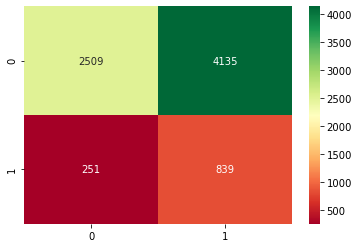

In [43]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve
from sklearn import metrics

# Logistic Regression

model_logistic=linear_model.LogisticRegression()

# fit the model

logistic_model=model_logistic.fit(X_train,y_train)
predit_train_logistic=logistic_model.predict(X_train)
predict_test_logistic=logistic_model.predict(X_test)

# accuracy of model

logistic_accuracy_train=accuracy_score(y_train,predit_train_logistic)
print('Logistic Training Accuracy: %.4f' % logistic_accuracy_train)
logistic_accuracy_test=accuracy_score(y_test,predict_test_logistic)
print('Logistic Testing Accuracy: %.4f' % logistic_accuracy_test)

# plotting confusion matrix for prediction


logistic_cf=confusion_matrix(y_test,predict_test_logistic)
print(logistic_cf)
ax = sns.heatmap(logistic_cf, annot=True, fmt="d",cmap='RdYlGn')



Knn Training Accuracy: 0.6424
Knn Testing Accuracy: 0.6099
[[4245 2399]
 [ 618  472]]


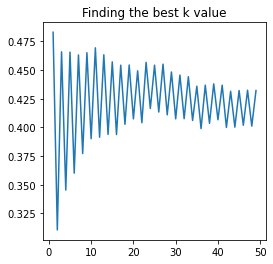

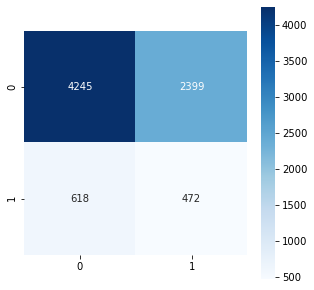

In [44]:
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

# plotting the k value so that we can select the best value of k, k = 10

plt.figure(figsize=(4,4))
plt.plot(range(1, 50), error)
plt.title("Finding the best k value")

# knn with k=10

knn = KNeighborsClassifier(n_neighbors=10)

# fit the model

knn = knn.fit(X_train, y_train)
knn_predict_train = knn.predict(X_train)
knn_predict_test = knn.predict(X_test)

# accuracy of model

knn_accuracy_train = accuracy_score(y_train, knn_predict_train)
print('Knn Training Accuracy: %.4f' %knn_accuracy_train)
knn_accuracy_test = accuracy_score(y_test,knn_predict_test)
print('Knn Testing Accuracy: %.4f'%knn_accuracy_test)

# plotting confusion matrix for prediction

knn_cf = confusion_matrix(y_test, knn_predict_test)
print(knn_cf)
plt.figure(figsize=(5,5))
ax = sns.heatmap(knn_cf, annot=True, fmt="d", cmap="Blues", square=True)

Naive Training Accuracy: 0.5908
Naive Testing Accuracy: 0.6702
[[4645 1999]
 [ 552  538]]


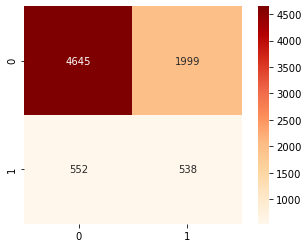

In [45]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes

gb =  GaussianNB()

# fit the model

naive = gb.fit(X_train, y_train)
naive_predict_train = gb.predict(X_train)
naive_predict_test = gb.predict(X_test)

# accuracy of model

naive_accuracy_train = accuracy_score(y_train, naive_predict_train)
print('Naive Training Accuracy: %.4f' %naive_accuracy_train)
naive_accuracy_test = accuracy_score(y_test, naive_predict_test)
print('Naive Testing Accuracy: %.4f'%naive_accuracy_test)

# plotting confusion matrix for prediction

naive_cf = confusion_matrix(y_test, naive_predict_test)
print(naive_cf)
ax = sns.heatmap(naive_cf, annot=True, fmt="d", cmap='OrRd', square=True)

RandomForest Training Accuracy: 0.9514
RandomForest Testing Accuracy: 0.5484
[[3623 3021]
 [ 472  618]]


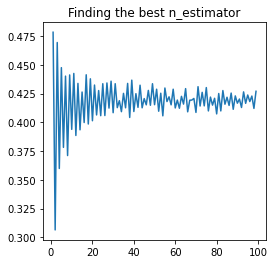

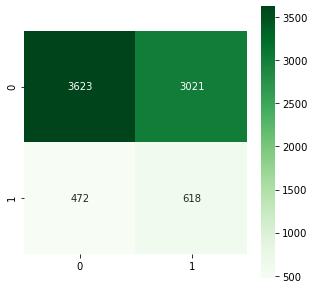

In [46]:
from sklearn.ensemble import RandomForestClassifier

error = []

for i in range(1, 100):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    error.append(np.mean(pred != y_test))
    

plt.figure(figsize=(4,4))
plt.plot(range(1, 100), error)
plt.title("Finding the best n_estimator")

# Random Forest

rfc=RandomForestClassifier(n_estimators=5,random_state=0)

# fit the model

randomforest = rfc.fit(X_train, y_train)
randomforest_predict_train=rfc.predict(X_train)
randomforest_predict_test=rfc.predict(X_test)

# accuracy of model

randomforest_accuracy_train = accuracy_score(y_train, randomforest_predict_train)
print('RandomForest Training Accuracy: %.4f' %randomforest_accuracy_train)
randomforest_accuracy_test = accuracy_score(y_test, randomforest_predict_test)
print('RandomForest Testing Accuracy: %.4f'%randomforest_accuracy_test)

# plotting confusion matrix for prediction

random_cf = confusion_matrix(y_test, randomforest_predict_test)
print(random_cf)
plt.figure(figsize=(5,5))
ax = sns.heatmap(random_cf, annot=True, fmt="d", cmap='Greens', square=True)

In [47]:
from tabulate import tabulate

models=[('1','Logistic',logistic_accuracy_test),('2','KNN',knn_accuracy_test),('3','Naive Bayes',naive_accuracy_test),('4','Random Forest',randomforest_accuracy_test)]
header=['No.','Model Name','Accuracy']
print(tabulate(models,headers=header))


  No.  Model Name       Accuracy
-----  -------------  ----------
    1  Logistic         0.432894
    2  KNN              0.609904
    3  Naive Bayes      0.670158
    4  Random Forest    0.548358
